# Project 1

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


##### 1. What does the data describe?

SAT Scores across the states in the USA.  The data breaks the score down between the Verbal and Math sections and also gives us the percentage of students who take the test in each state.

##### 2. Does the data look complete? Are there any obvious issues with the observations?

The data looks complete and I can't seem to find any obvious issues with the observations.

##### 3. Create a data dictionary for the dataset.

Field Name       Data Type          Description

States           String              Abreviation of each state in the USA
Rate             Int                 The percentage of students that take the test in each state
Verbal           Int                 The average score on the Verbal section in each state
Math             Int                 The average score on the Math section in each state

## Step 2: Load the data.

##### 4. Load the data into a list of lists

In [2]:
import scipy.stats as stats

# Pandas handles dataset loading and manipulation:
import pandas as pd

# import the plotting functions:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

# Setup matplotlib to display in notebook:
%matplotlib inline


import numpy as np
import csv

file_path = '../assets/sat_scores.csv'

rows = []
with open(file_path, 'r') as s:
    reader = csv.reader(s)
    for row in reader:
        rows.append(row)
        
        

    

##### 5. Print the data

In [3]:
print rows

[['State', 'Rate', 'Verbal', 'Math'], ['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12

##### 6. Extract a list of the labels from the data, and remove them from the data.

In [4]:
headers = rows[0]
data = rows[1:]
print headers

['State', 'Rate', 'Verbal', 'Math']


##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [5]:
state_names = []
for i,h in enumerate(headers):
    if h == 'State':
        for cell in data:
            state_names.append(cell[i])
print state_names

['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NB', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All']


#### 8. Print the types of each column

In [6]:
for cell in data[0]:
    print type(cell)




<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>


##### 9. Do any types need to be reassigned? If so, go ahead and do it.

In [7]:
for i, h in enumerate(headers):
    if h == 'Rate' or h == 'Verbal' or h == 'Math':
        for cell in data:
            cell[i]= int(cell[i])
print data

[['CT', 82, 509, 510], ['NJ', 81, 499, 513], ['MA', 79, 511, 515], ['NY', 77, 495, 505], ['NH', 72, 520, 516], ['RI', 71, 501, 499], ['PA', 71, 500, 499], ['VT', 69, 511, 506], ['ME', 69, 506, 500], ['VA', 68, 510, 501], ['DE', 67, 501, 499], ['MD', 65, 508, 510], ['NC', 65, 493, 499], ['GA', 63, 491, 489], ['IN', 60, 499, 501], ['SC', 57, 486, 488], ['DC', 56, 482, 474], ['OR', 55, 526, 526], ['FL', 54, 498, 499], ['WA', 53, 527, 527], ['TX', 53, 493, 499], ['HI', 52, 485, 515], ['AK', 51, 514, 510], ['CA', 51, 498, 517], ['AZ', 34, 523, 525], ['NV', 33, 509, 515], ['CO', 31, 539, 542], ['OH', 26, 534, 439], ['MT', 23, 539, 539], ['WV', 18, 527, 512], ['ID', 17, 543, 542], ['TN', 13, 562, 553], ['NM', 13, 551, 542], ['IL', 12, 576, 589], ['KY', 12, 550, 550], ['WY', 11, 547, 545], ['MI', 11, 561, 572], ['MN', 9, 580, 589], ['KS', 9, 577, 580], ['AL', 9, 559, 554], ['NB', 8, 562, 568], ['OK', 8, 567, 561], ['MO', 8, 577, 577], ['LA', 7, 564, 562], ['WI', 6, 584, 596], ['AR', 6, 562, 55

##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [8]:
state_dict = {}

for i,h in enumerate(headers):
    state_dict[h] = []
    for cell in data:
        state_dict[h].append(cell[i])
print state_dict    

{'Math': [510, 513, 515, 505, 516, 499, 499, 506, 500, 501, 499, 510, 499, 489, 501, 488, 474, 526, 499, 527, 499, 515, 510, 517, 525, 515, 542, 439, 539, 512, 542, 553, 542, 589, 550, 545, 572, 589, 580, 554, 568, 561, 577, 562, 596, 550, 570, 603, 582, 599, 551, 514], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NB', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': [82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56, 55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12, 12, 11, 11, 9, 9, 9, 8, 8, 8, 7, 6, 6, 5, 5, 4, 4, 4, 45], 'Verbal': [509, 499, 511, 495, 520, 501, 500, 511, 506, 510, 501, 508, 493, 491, 499, 486, 482, 526, 498, 527, 493, 485, 514, 498, 523, 509, 539, 534, 539, 527, 543, 562, 551, 576, 550, 547, 561, 580, 

##### 11. Create a dictionary with the values for each of the numeric columns

In [9]:
num_dict = {}

for h in headers:
    if h == 'Math' or h == 'Verbal' or h == 'Rate':
        num_dict[h] = state_dict[h]

print num_dict


{'Rate': [82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56, 55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12, 12, 11, 11, 9, 9, 9, 8, 8, 8, 7, 6, 6, 5, 5, 4, 4, 4, 45], 'Math': [510, 513, 515, 505, 516, 499, 499, 506, 500, 501, 499, 510, 499, 489, 501, 488, 474, 526, 499, 527, 499, 515, 510, 517, 525, 515, 542, 439, 539, 512, 542, 553, 542, 589, 550, 545, 572, 589, 580, 554, 568, 561, 577, 562, 596, 550, 570, 603, 582, 599, 551, 514], 'Verbal': [509, 499, 511, 495, 520, 501, 500, 511, 506, 510, 501, 508, 493, 491, 499, 486, 482, 526, 498, 527, 493, 485, 514, 498, 523, 509, 539, 534, 539, 527, 543, 562, 551, 576, 550, 547, 561, 580, 577, 559, 562, 567, 577, 564, 584, 562, 575, 593, 577, 592, 566, 506]}


## Step 3: Describe the data

##### 12. Print the min and max of each column

In [10]:
for n in num_dict:
    print n, "Max:", max(num_dict[n]), "Min:", min(num_dict[n])
    

Rate Max: 82 Min: 4
Math Max: 603 Min: 439
Verbal Max: 593 Min: 482


##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [12]:
def stand_dev(rand_list):
    return [np.std(rand_list[i]) for i in rand_list]

stand_dev(num_dict)

[27.037996494523586, 35.666996164305949, 32.915094961603266]

## Step 4: Visualize the data

##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

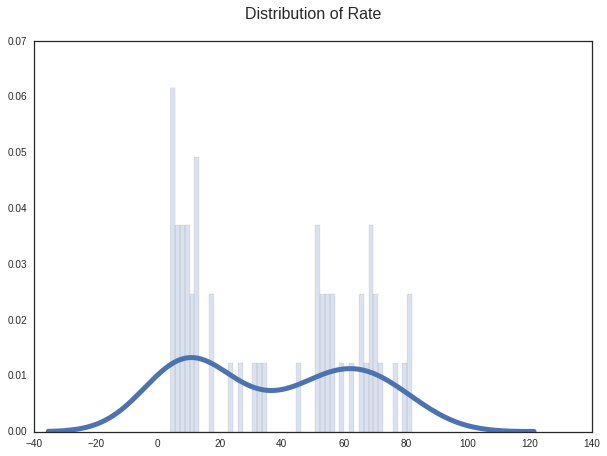

In [16]:
import seaborn as sns
%matplotlib inline

def distribution_plotter(column, data):
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style("white")
    dist = sns.distplot(data, 50, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    dist.set_title('Distribution of ' + column + '\n', fontsize=16)

distribution_plotter('Rate',num_dict['Rate'])


##### 15. Plot the Math distribution

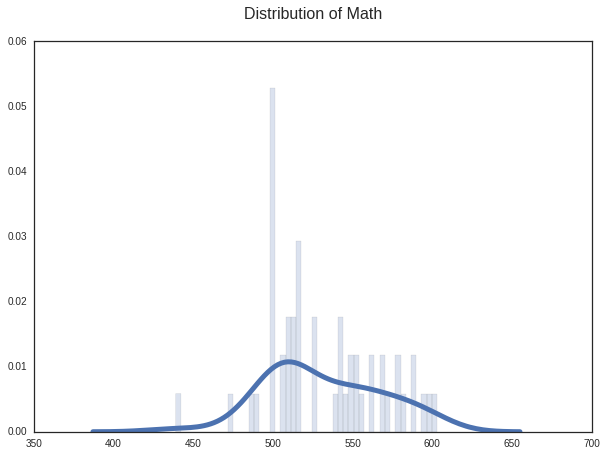

In [17]:
distribution_plotter('Math',num_dict['Math'])

##### 16. Plot the Verbal distribution

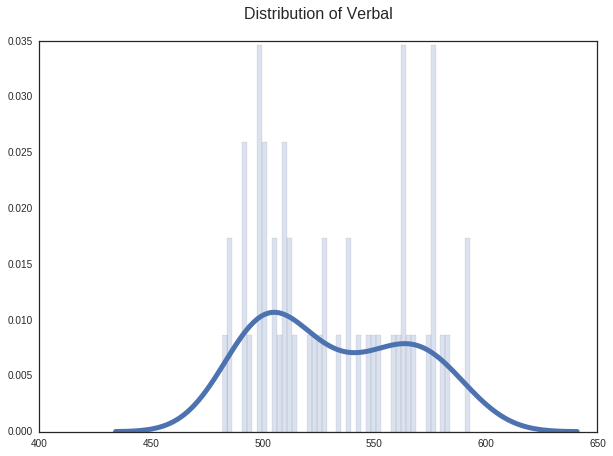

In [18]:
distribution_plotter('Verbal',num_dict['Verbal'])

##### 17. What is the typical assumption for data distribution?

In [19]:
'Typically you assume data is normally distributed and the mean, mode, and'
'median are all the same'

'median are all the same'

##### 18. Does that distribution hold true for our data?

In [21]:
"It doesn't hold true for our data, there are multiple apexes in our graphs"

"It doesn't hold true for our data, there are multiple apexes in our graphs"

##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

In [52]:
import plotly.plotly as py
import plotly.graph_objs as go
rate = num_dict['Rate']
verbal = num_dict['Verbal']
math_score = num_dict['Math']

verbal1 = go.Scatter(
    x = rate,
    y = verbal,
    mode = 'markers',
    marker={'size':11,
            'line':{'width':0},
            'color':'steelblue',
            'symbol':"x",
            'opacity':0.65},
    name='Verbal'
)

math1 = go.Scatter(
    x = rate,
    y = math_score,
    mode = 'markers',
    marker={'size':11,
            'line':{'width':0},
            'color':'darkred',
            'symbol':"x",
            'opacity':0.65},
    name='Math'
)

data = [verbal1,math1]

layout = go.Layout(
    title='Math and Verbal Scores vs. Rate',
    hovermode='closest',
    xaxis={
        'title':'Rate',
        'ticklen':5,
        'gridwidth':2,
    },
    yaxis={
        'title':'Scores',
        'ticklen':5,
        'gridwidth':2,
    },
    height=600,
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Math and Verbal Scores vs. Rate')

##### 20. Are there any interesting relationships to note?

In [ ]:
'This graph shows that the more students that take the test the lower average score is in that state.'
'This would indicate a selection bias. In states where the SAT score is significantly higher,the SAT is' 
'probably not a big push from schools and only highly motivated individuals, will attempt creating a '
'higher average'


##### 21. Create box plots for each variable. 

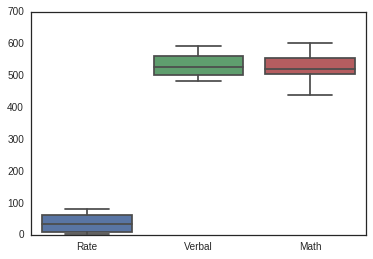

In [58]:
# sns.boxplot(x=verbal, y=math, hue = )
new_data = pd.read_csv('../assets/sat_scores.csv')
sns.boxplot(new_data)

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 